In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from run_simulations import run_experiments

In [2]:
experiment_1 = {
    "experiment_name": "experiment_1",
    "number_arms": 5,
    "sample_size": 100,
    "first_stage_size": 40,
    "distribution": [
        0.1,
        0.5,
        1,
        0.75,
        0.25
    ],
    "random_seed": 42
}

In [3]:
experiment_2 = {
    "experiment_name": "experiment_2",
    "number_arms": 5,
    "sample_size": 100,
    "first_stage_size": 40,
    "distribution": [
        0.55,
        0.6,
        0.57,
        0.5,
        0.7
    ],
    "random_seed": 42
}

In [4]:
experiment_3 = {
    "experiment_name": "experiment_3",
    "number_arms": 5,
    "sample_size": 100,
    "first_stage_size": 40,
    "distribution": [
        0.9,
        0.9,
        0.1,
        0.1,
        0.1
    ],
    "random_seed": 42
}

In [5]:
experiments = [experiment_1, experiment_2, experiment_3]
for experiment in experiments:
    run_experiments(experiment)

artifacts = []
for experiment in experiments:
    with open(f'artifacts_{experiment["experiment_name"]}.pkl', "rb") as f:
        artifact = pickle.load(f)
        artifacts.append(artifact)

In [6]:
artifacts

[{'sample_split': {'certificate': array([0.68399724]),
   'B': array([2]),
   'delta': np.float64(0.3160027570319596),
   'true_value': np.float64(0.6839972429680403)},
  'omniscient': {'certificate': array([0.68399724]),
   'B': array([2]),
   'delta': np.float64(0.3160027570319596)},
  'dominant': {'certificate': array([0.68399724]),
   'B': array([2]),
   'delta': np.float64(0.3160027570319596)}},
 {'sample_split': {'certificate': array([0.46733058]),
   'B': array([4]),
   'delta': np.float64(0.3160027570319596),
   'true_value': np.float64(0.38399724296804033)},
  'omniscient': {'certificate': array([0.41733058]),
   'B': array([4]),
   'delta': np.float64(0.3160027570319596)},
  'dominant': {'certificate': array([0.33399724]),
   'B': array([4]),
   'delta': np.float64(0.3160027570319596)}},
 {'sample_split': {'certificate': array([0.55310462, 0.51977128]),
   'B': array([0, 1]),
   'delta': np.float64(0.4468953847418872),
   'true_value': np.float64(0.5839972429680405)},
  'omni

In [7]:
mu = [0.1, 0.5, 1, 0.75, 0.25]

In [8]:
def plot_with_bounds(ax, artifact, line_color, index, offset, x, experiment_run=None):
    print("artifact", artifact)
    lower_bounds = artifact["certificate"]
    B = artifact["B"]
    delta = artifact["delta"]
    marker_size = 3  # Adjust the size of the 'x' marks

    # Plot the main array as dots


    # Plot the lower bounds as solid lines and horizontal bars
    for i, arm in enumerate(B):
        x_offset = x[arm] + offset * index
        ax.plot([x_offset, x_offset], [lower_bounds[i], lower_bounds[i] + delta], '-', color=line_color, label=experiment_run if i == 0 else "")  # Vertical line
        ax.plot([x_offset - 0.05, x_offset + 0.05], [lower_bounds[i], lower_bounds[i]], '-', color=line_color)  # Horizontal bar
        ax.plot(x_offset, lower_bounds[i] + delta, 'x', color=line_color, markersize=marker_size)  # Upper confidence bound as 'x'
    

def plot_axes(ax, artifact, mu):
    # TODO change this
    x = np.arange(len(mu))
    y = mu  # Array to be plotted as dots
    dot_color = 'red'
    ax.plot(x, y, 'o', color=dot_color, label='Data points')
    plt.style.use('ggplot')

    colors = ['dodgerblue', '#2ca02c', '#ff7f0e']
    offset = 0.05 
    print(artifact)
    for index, (experiment_run, color) in enumerate(zip(artifact.keys(), colors)):
        plot_with_bounds(ax, artifact[experiment_run], color, index, offset, x, experiment_run)

    # Add labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Plot with Data Points and Lower Bounds')
    ax.legend()

    # Customize the background grid lines to match ggplot
    ax.grid(True, color='white', linestyle='-', linewidth=0.7)
    ax.set_facecolor('#E5E5E5')  # ggplot-like grey background





{'sample_split': {'certificate': array([0.68399724]), 'B': array([2]), 'delta': np.float64(0.3160027570319596), 'true_value': np.float64(0.6839972429680403)}, 'omniscient': {'certificate': array([0.68399724]), 'B': array([2]), 'delta': np.float64(0.3160027570319596)}, 'dominant': {'certificate': array([0.68399724]), 'B': array([2]), 'delta': np.float64(0.3160027570319596)}}
artifact {'certificate': array([0.68399724]), 'B': array([2]), 'delta': np.float64(0.3160027570319596), 'true_value': np.float64(0.6839972429680403)}
artifact {'certificate': array([0.68399724]), 'B': array([2]), 'delta': np.float64(0.3160027570319596)}
artifact {'certificate': array([0.68399724]), 'B': array([2]), 'delta': np.float64(0.3160027570319596)}
{'sample_split': {'certificate': array([0.46733058]), 'B': array([4]), 'delta': np.float64(0.3160027570319596), 'true_value': np.float64(0.38399724296804033)}, 'omniscient': {'certificate': array([0.41733058]), 'B': array([4]), 'delta': np.float64(0.316002757031959

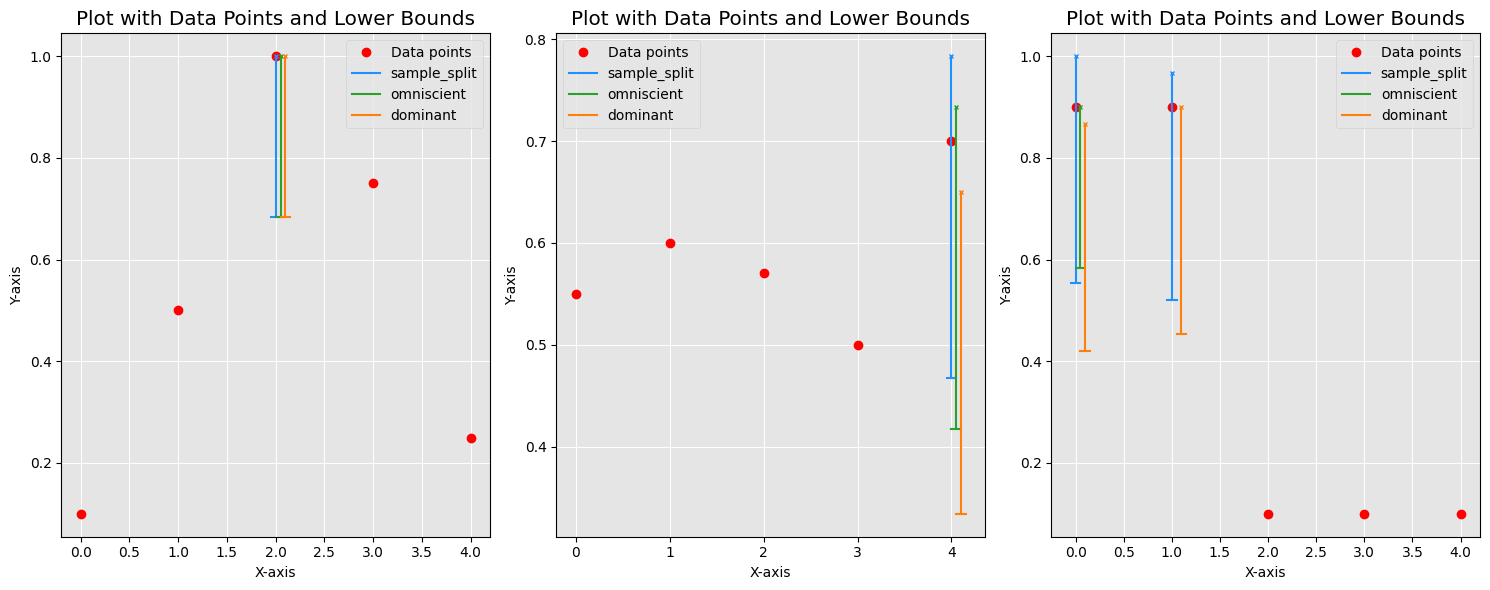

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axes = plt.subplots(1, len(artifacts), figsize=(5 * len(artifacts), 6))  # Adjust width for number of artifacts

# Plot each artifact in a separate subplot
for index, (artifact, experiment) in enumerate(zip(artifacts, experiments)):
    mu = experiment["distribution"]
    plot_axes(axes[index], artifact, mu)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot to a file
plt.show()
plt.savefig('plot_with_bounds.png')

In [10]:
experiment_1 = {
    "experiment_name": "experiment_1",
    "number_arms": 5,
    "sample_size": 1000,
    "first_stage_size": 600,
    "distribution": [
        0.1,
        0.5,
        1,
        0.75,
        0.25
    ],
    "random_seed": 42
}

experiment_2 = {
    "experiment_name": "experiment_2",
    "number_arms": 5,
    "sample_size": 1000,
    "first_stage_size": 600,
    "distribution": [
        0.55,
        0.6,
        0.57,
        0.5,
        0.7
    ],
    "random_seed": 42
}

experiment_3 = {
    "experiment_name": "experiment_3",
    "number_arms": 5,
    "sample_size": 1000,
    "first_stage_size": 600,
    "distribution": [
        0.9,
        0.9,
        0.1,
        0.1,
        0.1
    ],
    "random_seed": 42
}


In [11]:
experiments = [experiment_1, experiment_2, experiment_3]
for experiment in experiments:
    run_experiments(experiment)

artifacts = []
for experiment in experiments:
    with open(f'artifacts_{experiment["experiment_name"]}.pkl', "rb") as f:
        artifact = pickle.load(f)
        artifacts.append(artifact)

{'sample_split': {'certificate': array([0.87761266]), 'B': array([2]), 'delta': np.float64(0.12238734153404082), 'true_value': np.float64(0.8776126584659592)}, 'omniscient': {'certificate': array([0.87761266]), 'B': array([2]), 'delta': np.float64(0.12238734153404082)}, 'dominant': {'certificate': array([0.87761266]), 'B': array([2]), 'delta': np.float64(0.12238734153404082)}}
artifact {'certificate': array([0.87761266]), 'B': array([2]), 'delta': np.float64(0.12238734153404082), 'true_value': np.float64(0.8776126584659592)}
artifact {'certificate': array([0.87761266]), 'B': array([2]), 'delta': np.float64(0.12238734153404082)}
artifact {'certificate': array([0.87761266]), 'B': array([2]), 'delta': np.float64(0.12238734153404082)}
{'sample_split': {'certificate': array([0.55511266]), 'B': array([4]), 'delta': np.float64(0.12238734153404082), 'true_value': np.float64(0.5776126584659591)}, 'omniscient': {'certificate': array([0.58511266]), 'B': array([4]), 'delta': np.float64(0.122387341

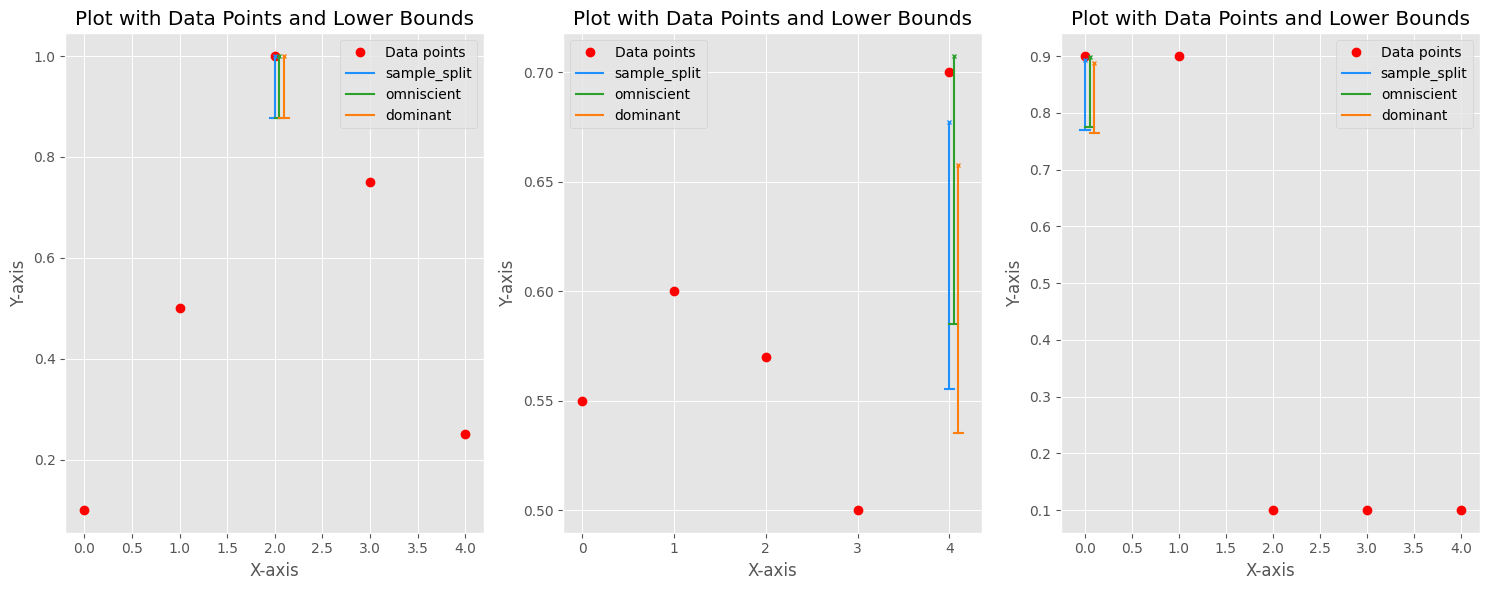

<Figure size 640x480 with 0 Axes>

In [12]:
fig, axes = plt.subplots(1, len(artifacts), figsize=(5 * len(artifacts), 6))  # Adjust width for number of artifacts

# Plot each artifact in a separate subplot
for index, (artifact, experiment) in enumerate(zip(artifacts, experiments)):
    mu = experiment["distribution"]
    plot_axes(axes[index], artifact, mu)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot to a file
plt.show()
plt.savefig('plot_with_bounds.png')

## n vs m

In [13]:
N = 100

In [14]:
experiments = []
for i in range(1, 10):
    print(i)
    experiments.append(
        {
        "experiment_name": f"experiment_m_{i}",
        "number_arms": 5,
        "sample_size": N,
        "first_stage_size": int(N * 0.1 * i),
        "distribution": [
            0.55,
            0.6,
            0.57,
            0.5,
            0.7
        ],
        "random_seed": 42
    }
    )

1
2
3
4
5
6
7
8
9


In [15]:
for experiment in experiments:
    print(experiment["first_stage_size"])
    run_experiments(experiment)

artifacts = []
for experiment in experiments:
    with open(f'artifacts_{experiment["experiment_name"]}.pkl', "rb") as f:
        artifact = pickle.load(f)
        artifacts.append(artifact)
        print(artifact)

10
20
30
40
50
60
70
80
90
{'sample_split': {'certificate': array([0.49754038]), 'B': array([4]), 'delta': np.float64(0.25801517068033), 'true_value': np.float64(0.44198482931967)}, 'omniscient': {'certificate': array([0.43087372]), 'B': array([4]), 'delta': np.float64(0.25801517068033)}, 'dominant': {'certificate': array([0.34622256, 0.07955589]), 'B': array([4, 3]), 'delta': np.float64(0.3648885536741316)}}
{'sample_split': {'certificate': array([0.48883358]), 'B': array([4]), 'delta': np.float64(0.2736664152555987), 'true_value': np.float64(0.42633358474440125)}, 'omniscient': {'certificate': array([0.42633358]), 'B': array([4]), 'delta': np.float64(0.2736664152555987)}, 'dominant': {'certificate': array([0.41383358]), 'B': array([4]), 'delta': np.float64(0.2736664152555987)}}
{'sample_split': {'certificate': array([0.07196956, 0.44339813]), 'B': array([3, 4]), 'delta': np.float64(0.4137447296896268), 'true_value': np.float64(0.4074382959562698)}, 'omniscient': {'certificate': array

In [16]:
print(experiments[0])
print(artifacts[0])

{'experiment_name': 'experiment_m_1', 'number_arms': 5, 'sample_size': 100, 'first_stage_size': 10, 'distribution': [0.55, 0.6, 0.57, 0.5, 0.7], 'random_seed': 42}
{'sample_split': {'certificate': array([0.49754038]), 'B': array([4]), 'delta': np.float64(0.25801517068033), 'true_value': np.float64(0.44198482931967)}, 'omniscient': {'certificate': array([0.43087372]), 'B': array([4]), 'delta': np.float64(0.25801517068033)}, 'dominant': {'certificate': array([0.34622256, 0.07955589]), 'B': array([4, 3]), 'delta': np.float64(0.3648885536741316)}}


{'sample_split': {'certificate': array([0.49754038]), 'B': array([4]), 'delta': np.float64(0.25801517068033), 'true_value': np.float64(0.44198482931967)}, 'omniscient': {'certificate': array([0.43087372]), 'B': array([4]), 'delta': np.float64(0.25801517068033)}, 'dominant': {'certificate': array([0.34622256, 0.07955589]), 'B': array([4, 3]), 'delta': np.float64(0.3648885536741316)}}
artifact {'certificate': array([0.49754038]), 'B': array([4]), 'delta': np.float64(0.25801517068033), 'true_value': np.float64(0.44198482931967)}
artifact {'certificate': array([0.43087372]), 'B': array([4]), 'delta': np.float64(0.25801517068033)}
artifact {'certificate': array([0.34622256, 0.07955589]), 'B': array([4, 3]), 'delta': np.float64(0.3648885536741316)}
{'sample_split': {'certificate': array([0.48883358]), 'B': array([4]), 'delta': np.float64(0.2736664152555987), 'true_value': np.float64(0.42633358474440125)}, 'omniscient': {'certificate': array([0.42633358]), 'B': array([4]), 'delta': np.float64

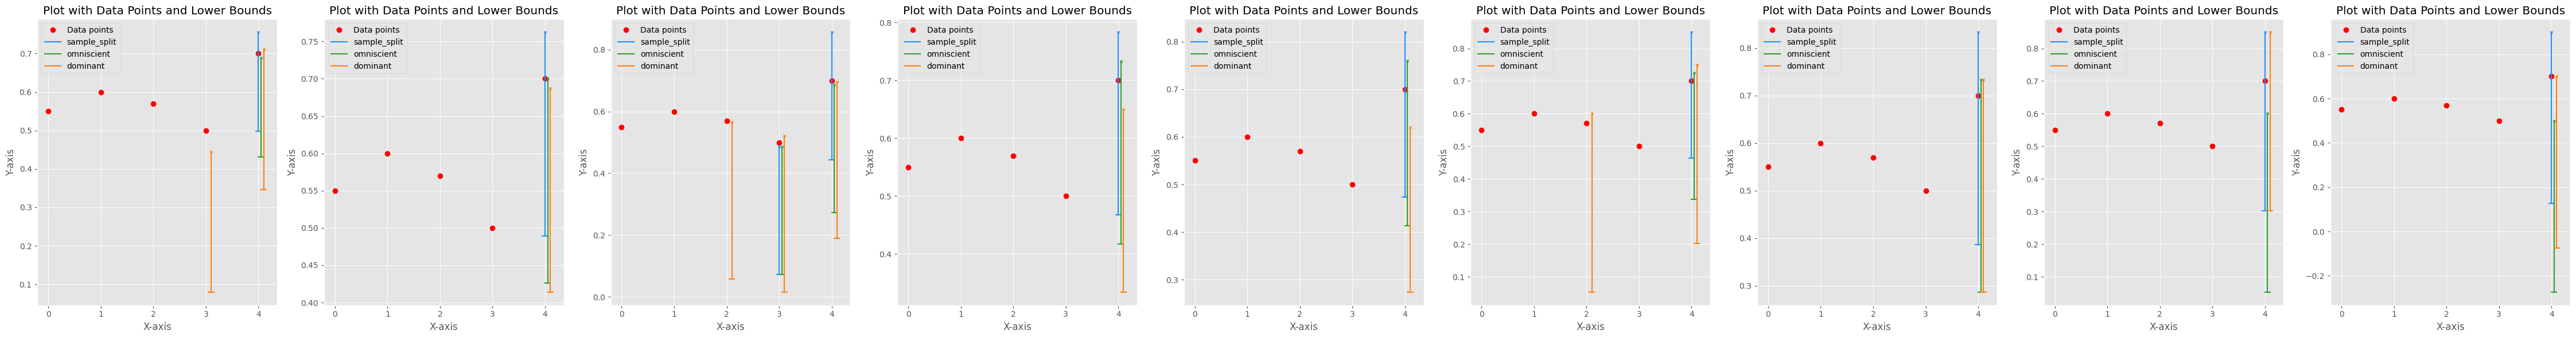

<Figure size 640x480 with 0 Axes>

In [17]:
fig, axes = plt.subplots(1, len(artifacts), figsize=(5 * len(artifacts), 6))  # Adjust width for number of artifacts

# Plot each artifact in a separate subplot
for index, (artifact, experiment) in enumerate(zip(artifacts, experiments)):
    mu = experiment["distribution"]
    plot_axes(axes[index], artifact, mu)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot to a file
plt.show()
plt.savefig('plot_with_bounds.png')

In [18]:
experiments = []
for i in range(2, 9):
    print(i)
    experiments.append(
        {
        "experiment_name": f"experiment_m_{i}",
        "number_arms": 5,
        "sample_size": N,
        "first_stage_size": int(N * 0.1 * i),
        "distribution": [
            0.9,
            0.9,
            0.1,
            0.1,
            0.1
        ],
        "random_seed": 42
    }
    )

2
3
4
5
6
7
8


In [19]:
# experiments = [experiment_1, experiment_2, experiment_3]
for experiment in experiments:
    print(experiment["first_stage_size"])
    run_experiments(experiment)

artifacts = []
for experiment in experiments:
    with open(f'artifacts_{experiment["experiment_name"]}.pkl', "rb") as f:
        artifact = pickle.load(f)
        artifacts.append(artifact)

20
30
40
50
60
70
80


{'sample_split': {'certificate': array([0.68883358]), 'B': array([0]), 'delta': np.float64(0.2736664152555987), 'true_value': np.float64(0.6263335847444014)}, 'omniscient': {'certificate': array([0.60133358]), 'B': array([0]), 'delta': np.float64(0.2736664152555987)}, 'dominant': {'certificate': array([0.53797724, 0.51297724]), 'B': array([0, 1]), 'delta': np.float64(0.38702275602049496)}}
artifact {'certificate': array([0.68883358]), 'B': array([0]), 'delta': np.float64(0.2736664152555987), 'true_value': np.float64(0.6263335847444014)}
artifact {'certificate': array([0.60133358]), 'B': array([0]), 'delta': np.float64(0.2736664152555987)}
artifact {'certificate': array([0.53797724, 0.51297724]), 'B': array([0, 1]), 'delta': np.float64(0.38702275602049496)}
{'sample_split': {'certificate': array([0.67886687]), 'B': array([1]), 'delta': np.float64(0.29256170404373016), 'true_value': np.float64(0.6074382959562699)}, 'omniscient': {'certificate': array([0.59315258]), 'B': array([1]), 'delt

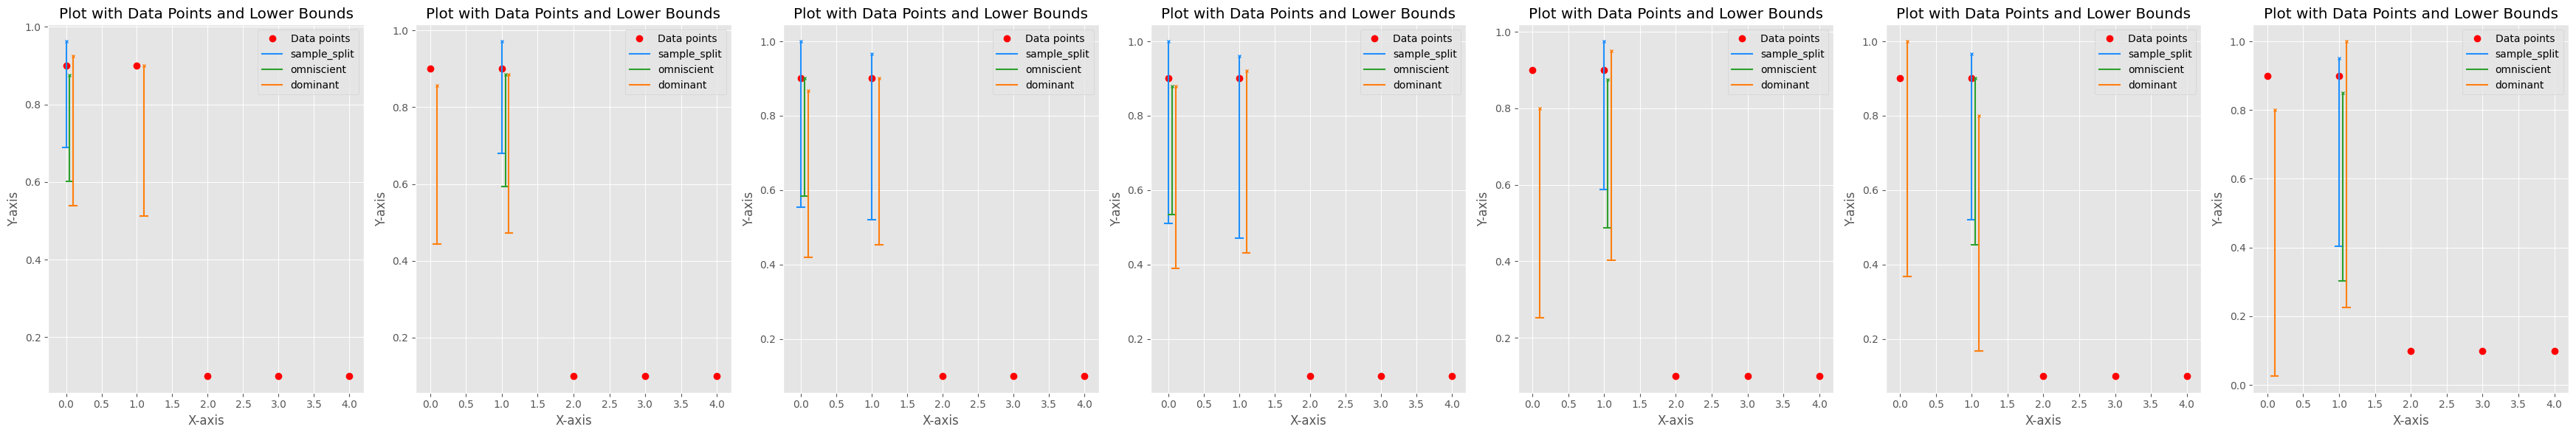

<Figure size 640x480 with 0 Axes>

In [20]:
fig, axes = plt.subplots(1, len(artifacts), figsize=(5 * len(artifacts), 6))  # Adjust width for number of artifacts

# Plot each artifact in a separate subplot
for index, (artifact, experiment) in enumerate(zip(artifacts, experiments)):
    mu = experiment["distribution"]
    plot_axes(axes[index], artifact, mu)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot to a file
plt.show()
plt.savefig('plot_with_bounds.png')

## Experiments with multiple with + 20 arms, thousands?

In [21]:
K = 100
rng = np.random.default_rng(42)
# mu = [rng.uniform(0.48, 0.52) for _ in range(K)]
# mu =[rng.uniform(0.88, 0.92) if rng.random() < 0.5 else rng.uniform(0.08, 0.12) for _ in range(K)]
mu = [rng.uniform(0.68, 0.85) if rng.random() < 0.5 else rng.uniform(0.08, 0.12) for _ in range(K)]
mu[-1] = 0.92 
print(mu)

[0.0975551375900821, 0.10789472116237456, 0.8458557997782485, 0.11144257221107814, 0.7565656094422464, 0.8375500481042623, 0.1129104645308332, 0.7186305827034121, 0.08255269024416702, 0.10526657596488259, 0.09418103872519473, 0.1157248448528879, 0.0877855483140787, 0.687446640183829, 0.7961183220512172, 0.1187003892973684, 0.7429781500259277, 0.7122101310443286, 0.7608698374584087, 0.7938683790960268, 0.8215552933298323, 0.09249466565528164, 0.11219057429987207, 0.7290157776681415, 0.0855900993443724, 0.681251585857671, 0.10659403426368128, 0.11122916124087871, 0.776686003311992, 0.6994701125011156, 0.0988438482457253, 0.11059995429664102, 0.10214317602631984, 0.09215800392250449, 0.7542419561695016, 0.7494498694331881, 0.08935757943461363, 0.7278352616437395, 0.7925258075035722, 0.11135592836425653, 0.09625547445760282, 0.08667891679630815, 0.6953081363318592, 0.09847508921005549, 0.7651776117675718, 0.7983744637632151, 0.7447736084364021, 0.7871480408302111, 0.6949004862837372, 0.843

In [22]:
experiment_1 = {
    "experiment_name": "experiment_1",
    "number_arms": K,
    "sample_size": 100000,
    "first_stage_size": 20000,
    "distribution": mu,
    "random_seed": 42
}
experiment_2 = {
    "experiment_name": "experiment_2",
    "number_arms": K//2,
    "sample_size": 1000000,
    "first_stage_size": 20000,
    "distribution": mu[(K//2):],
    "random_seed": 42
}
print(mu)

[0.0975551375900821, 0.10789472116237456, 0.8458557997782485, 0.11144257221107814, 0.7565656094422464, 0.8375500481042623, 0.1129104645308332, 0.7186305827034121, 0.08255269024416702, 0.10526657596488259, 0.09418103872519473, 0.1157248448528879, 0.0877855483140787, 0.687446640183829, 0.7961183220512172, 0.1187003892973684, 0.7429781500259277, 0.7122101310443286, 0.7608698374584087, 0.7938683790960268, 0.8215552933298323, 0.09249466565528164, 0.11219057429987207, 0.7290157776681415, 0.0855900993443724, 0.681251585857671, 0.10659403426368128, 0.11122916124087871, 0.776686003311992, 0.6994701125011156, 0.0988438482457253, 0.11059995429664102, 0.10214317602631984, 0.09215800392250449, 0.7542419561695016, 0.7494498694331881, 0.08935757943461363, 0.7278352616437395, 0.7925258075035722, 0.11135592836425653, 0.09625547445760282, 0.08667891679630815, 0.6953081363318592, 0.09847508921005549, 0.7651776117675718, 0.7983744637632151, 0.7447736084364021, 0.7871480408302111, 0.6949004862837372, 0.843

In [23]:
experiments = [experiment_1, experiment_2]
for experiment in experiments:
    run_experiments(experiment)

artifacts = []
for experiment in experiments:
    with open(f'artifacts_{experiment["experiment_name"]}.pkl', "rb") as f:
        artifact = pickle.load(f)
        artifacts.append(artifact)

{'sample_split': {'certificate': array([0.89413336, 0.81063336, 0.80150836, 0.82088336, 0.81825836,
       0.79188336, 0.77300836, 0.75350836, 0.80088336, 0.81275836]), 'B': array([99, 65, 54, 51,  2, 96, 14, 56, 57, 49]), 'delta': np.float64(0.027366641525559867), 'true_value': np.float64(0.9113459080869886)}, 'omniscient': {'certificate': array([0.91099591]), 'B': array([99]), 'delta': np.float64(0.008654091913011426)}, 'dominant': {'certificate': array([0.91079591]), 'B': array([99]), 'delta': np.float64(0.008654091913011426)}}
artifact {'certificate': array([0.89413336, 0.81063336, 0.80150836, 0.82088336, 0.81825836,
       0.79188336, 0.77300836, 0.75350836, 0.80088336, 0.81275836]), 'B': array([99, 65, 54, 51,  2, 96, 14, 56, 57, 49]), 'delta': np.float64(0.027366641525559867), 'true_value': np.float64(0.9113459080869886)}
artifact {'certificate': array([0.91099591]), 'B': array([99]), 'delta': np.float64(0.008654091913011426)}
artifact {'certificate': array([0.91079591]), 'B': a

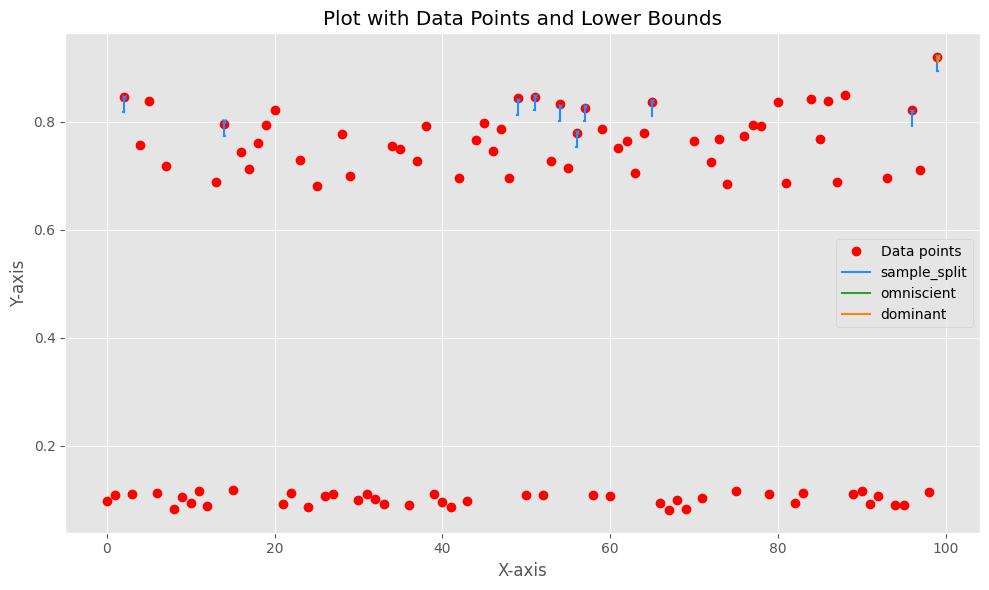

<Figure size 640x480 with 0 Axes>

In [24]:
fig, axes = plt.subplots(1, 1, figsize=(5 * len(artifacts), 6))  # Adjust width for number of artifacts

# Plot each artifact in a separate subplot
experiment = experiments[0]
artifact = artifacts[0]
dist = experiment["distribution"]
plot_axes(axes, artifact, dist)
    

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot to a file
plt.show()
plt.savefig('plot_with_bounds.png')

{'sample_split': {'certificate': array([0.91764067]), 'B': array([49]), 'delta': np.float64(0.0024725976894318363), 'true_value': np.float64(0.9175274023105682)}, 'omniscient': {'certificate': array([0.91768659]), 'B': array([49]), 'delta': np.float64(0.0024725976894318363)}, 'dominant': {'certificate': array([0.91757434]), 'B': array([49]), 'delta': np.float64(0.0024725976894318363)}}
artifact {'certificate': array([0.91764067]), 'B': array([49]), 'delta': np.float64(0.0024725976894318363), 'true_value': np.float64(0.9175274023105682)}
artifact {'certificate': array([0.91768659]), 'B': array([49]), 'delta': np.float64(0.0024725976894318363)}
artifact {'certificate': array([0.91757434]), 'B': array([49]), 'delta': np.float64(0.0024725976894318363)}


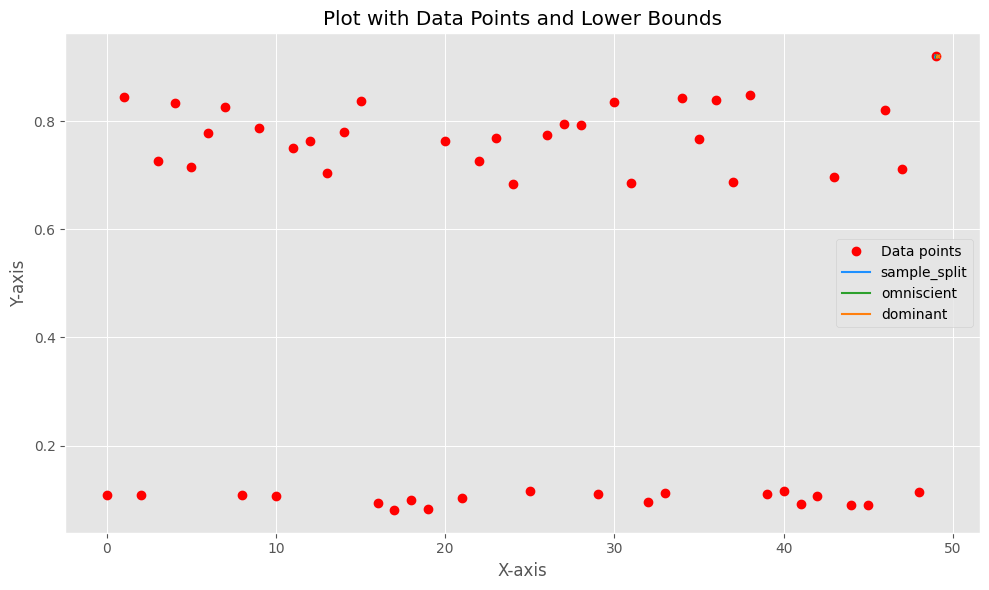

<Figure size 640x480 with 0 Axes>

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(5 * len(artifacts), 6))  # Adjust width for number of artifacts

# Plot each artifact in a separate subplot
experiment = experiments[1]
artifact = artifacts[1]
dist = experiment["distribution"]
plot_axes(axes, artifact, dist)
    

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot to a file
plt.show()
plt.savefig('plot_with_bounds.png')

In [26]:
boundle_experiments = []
K=100
mu = [rng.uniform(0.68, 0.85) if rng.random() < 0.5 else rng.uniform(0.58, 0.75) for _ in range(K)]
for N in [10000, 100000, 1000000]:
    experiments = []
    for i in range(1, 10):
        experiments.append(
            {
            "experiment_name": f"experiment_m_{i}_{N}",
            "number_arms": K,
            "sample_size": N,
            "first_stage_size": int(N * 0.1 * i),
            "distribution": mu,
            "random_seed": 42 + i
        }
        )
    boundle_experiments.append(experiments)


In [27]:
number_runs_per_experiment = 30
boundle_artifacts = []
for experiments in boundle_experiments:
    for experiment in experiments:
        artifact = {
            "sample_split": {"certificate":[], "B": [], "delta": [], "true_value": []}, 
            "omniscient": {"certificate":[], "B": [], "delta": [], "true_value": []}, 
            "dominant": {"certificate":[], "B": [], "delta": [], "true_value": []}
        }
        
        for i in range(number_runs_per_experiment):
            artifact_temp = run_experiments(experiment)
            

            sample_split = artifact["sample_split"]
            sample_split["certificate"].append(artifact_temp["sample_split"]["certificate"])
            sample_split["B"].append(artifact_temp["sample_split"]["B"])
            sample_split["delta"].append(artifact_temp["sample_split"]["delta"])
            sample_split["true_value"].append(artifact_temp["sample_split"]["true_value"])

            omniscient = artifact["omniscient"]
            omniscient["certificate"].append(artifact_temp["omniscient"]["certificate"])
            omniscient["B"].append(artifact_temp["omniscient"]["B"])
            omniscient["delta"].append(artifact_temp["omniscient"]["delta"])

            dominant = artifact["dominant"]
            dominant["certificate"].append(artifact_temp["dominant"]["certificate"])
            dominant["B"].append(artifact_temp["dominant"]["B"])
            dominant["delta"].append(artifact_temp["dominant"]["delta"])

        
        artifact["sample_split"]["certificate"] = np.mean(artifact["sample_split"]["certificate"], axis=0)
        artifact["sample_split"]["B"] = np.mean(artifact["sample_split"]["B"], axis=0)
        artifact["sample_split"]["delta"] = np.mean(artifact["sample_split"]["delta"], axis=0)
        artifact["sample_split"]["true_value"] = np.mean(artifact["sample_split"]["true_value"], axis=0)

        artifact["omniscient"]["certificate"] = np.mean(artifact["omniscient"]["certificate"], axis=0)
        artifact["omniscient"]["B"] = np.mean(artifact["omniscient"]["B"], axis=0)
        artifact["omniscient"]["delta"] = np.mean(artifact["omniscient"]["delta"], axis=0)

        artifact["dominant"]["certificate"] = np.mean(artifact["dominant"]["certificate"], axis=0)
        artifact["dominant"]["B"] = np.mean(artifact["dominant"]["B"], axis=0)
        artifact["dominant"]["delta"] = np.mean(artifact["dominant"]["delta"], axis=0)

        with open(f"artifacts_{experiment['experiment_name']}.pkl", "wb") as f:
            pickle.dump(artifact, f)

for experiments in boundle_experiments:
    artifacts = []
    for experiment in experiments:
        with open(f'artifacts_{experiment["experiment_name"]}.pkl', "rb") as f:
            artifact = pickle.load(f)
            artifacts.append(artifact)
    boundle_artifacts.append(artifacts)

{'sample_split': [], 'omniscient': [], 'dominant': []}
{'sample_split': [np.float64(0.7781327819269416)], 'omniscient': [], 'dominant': []}
{'sample_split': [np.float64(0.7781327819269416)], 'omniscient': [np.float64(0.8053104615258113)], 'dominant': []}
{'sample_split': [np.float64(0.7781327819269416)], 'omniscient': [np.float64(0.8053104615258113)], 'dominant': [np.float64(0.7870636325306004)]}
{'sample_split': [np.float64(0.7781327819269416), np.float64(0.7912667169488804)], 'omniscient': [np.float64(0.8053104615258113)], 'dominant': [np.float64(0.7870636325306004)]}
{'sample_split': [np.float64(0.7781327819269416), np.float64(0.7912667169488804)], 'omniscient': [np.float64(0.8053104615258113), np.float64(0.8077977243979505)], 'dominant': [np.float64(0.7870636325306004)]}
{'sample_split': [np.float64(0.7781327819269416), np.float64(0.7912667169488804)], 'omniscient': [np.float64(0.8053104615258113), np.float64(0.8077977243979505)], 'dominant': [np.float64(0.7870636325306004), np.flo

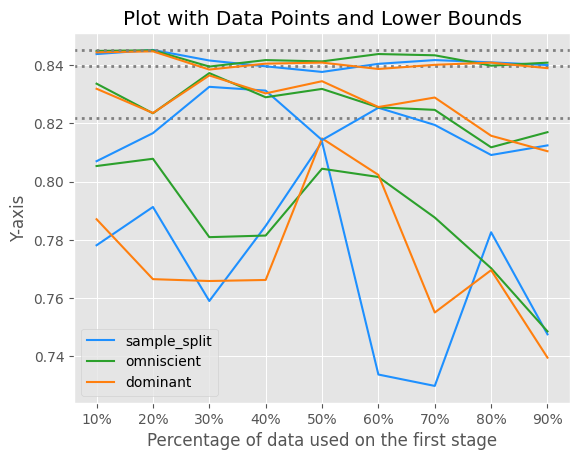

<Figure size 640x480 with 0 Axes>

In [28]:
certificates = []
colors = ['dodgerblue', '#2ca02c', '#ff7f0e']
# Create a figure and axis
fig, ax = plt.subplots()
legend_labels = []

for index, N in enumerate([1000, 10000, 100000]):
    # Plot each artifact in a separate subplot
    experiments = boundle_experiments[index]
    artifacts = boundle_artifacts[index]
    values = {"sample_split":[], "omniscient":[], "dominant": []}
    for artifact, experiment in zip(artifacts, experiments):
        for experiment_run in artifact.keys():
            print(values)
            values[experiment_run].append(max(artifact[experiment_run]["certificate"]))



    for color, experiment_name in zip(colors, values.keys()):
        if experiment_name not in legend_labels:  # Ensure each label is added only once
            ax.plot(values[experiment_name], color=color, label=experiment_name)
            legend_labels.append(experiment_name)  # Track the added label
        else:
            ax.plot(values[experiment_name], color=color)
    
    ax.axhline(y=artifacts[0]["sample_split"]["true_value"], color='grey', linestyle=':', linewidth=2)

        
# Set custom x-ticks
ax.set_xticks(range(len(values["sample_split"])))  # Assuming all have the same length
ax.set_xticklabels(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%'])


# Set labels and title
ax.set_xlabel('Experiment Index')
ax.set_ylabel('Certificate Value')
ax.set_title('Certificate Values for Different Experiments')

# Add a legend
ax.legend()

# Add labels and title
ax.set_xlabel('Percentage of data used on the first stage')
ax.set_ylabel('Y-axis')
ax.set_title('Plot with Data Points and Lower Bounds')
ax.legend()

# Customize the background grid lines to match ggplot
ax.grid(True, color='white', linestyle='-', linewidth=0.7)
ax.set_facecolor('#E5E5E5')  # ggplot-like grey background
    
    

# Save the plot to a file
plt.show()
plt.savefig('plot_with_bounds.png')